# Examine trans effect of TP53 Hotspot mutation in Renal Cancer

In [10]:
import pandas as pd
import numpy as np
import scipy.stats

import cptac
import cptac.utils as ut

import seaborn as sns
import matplotlib.pyplot as plt

co = cptac.Ccrcc()

In [16]:
proteomics_df = co.join_omics_to_mutations(omics_df_name='proteomics',omics_genes=['PLK1'],mutations_genes='TP53')
proteomics_df = co.reduce_multiindex(proteomics_df, levels_to_drop='Database_ID')
proteomics_df = proteomics_df.loc[proteomics_df['Sample_Status'] == 'Tumor']

proteomics_df

Name,PLK1_proteomics,TP53_Mutation,TP53_Location,TP53_Mutation_Status,Sample_Status
Patient_ID,,,,,
S001,-1.075393,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S002,-0.058357,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S003,NaN,[Missense_Mutation],[p.R280I],Single_mutation,Tumor
S004,0.016412,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S005,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S006,-1.181700,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S007,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S008,-0.802548,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S009,0.253955,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor


In [17]:
types = []
for ind, row in proteomics_df.iterrows():
    if 'Wildtype_Tumor' in row['TP53_Mutation']:
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Wildtype'
    
    if 'Missense_Mutation' in row['TP53_Mutation']:
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Missense'
        
    if 'Nonsense_Mutation' in row['TP53_Mutation']:
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Truncation'

In [18]:
proteomics_df = proteomics_df[['PLK1_proteomics', 'TP53_Categorical']]
proteomics_df

Name,PLK1_proteomics,TP53_Categorical
Patient_ID,,
S001,-1.075393,Wildtype
S002,-0.058357,Wildtype
S003,NaN,Missense
S004,0.016412,Wildtype
S005,NaN,Wildtype
S006,-1.181700,Wildtype
S007,NaN,Wildtype
S008,-0.802548,Wildtype
S009,0.253955,Wildtype


In [19]:
plotdf = pd.melt(proteomics_df, id_vars='TP53_Categorical', var_name='Protein', value_name='Abundance')
plotdf = plotdf.replace({'PLK1_proteomics':'PLK1'})
plotdf = plotdf.replace({'Hotspot_Missense':'Hotspot Missense','Other_Missense':'Other Missense'})

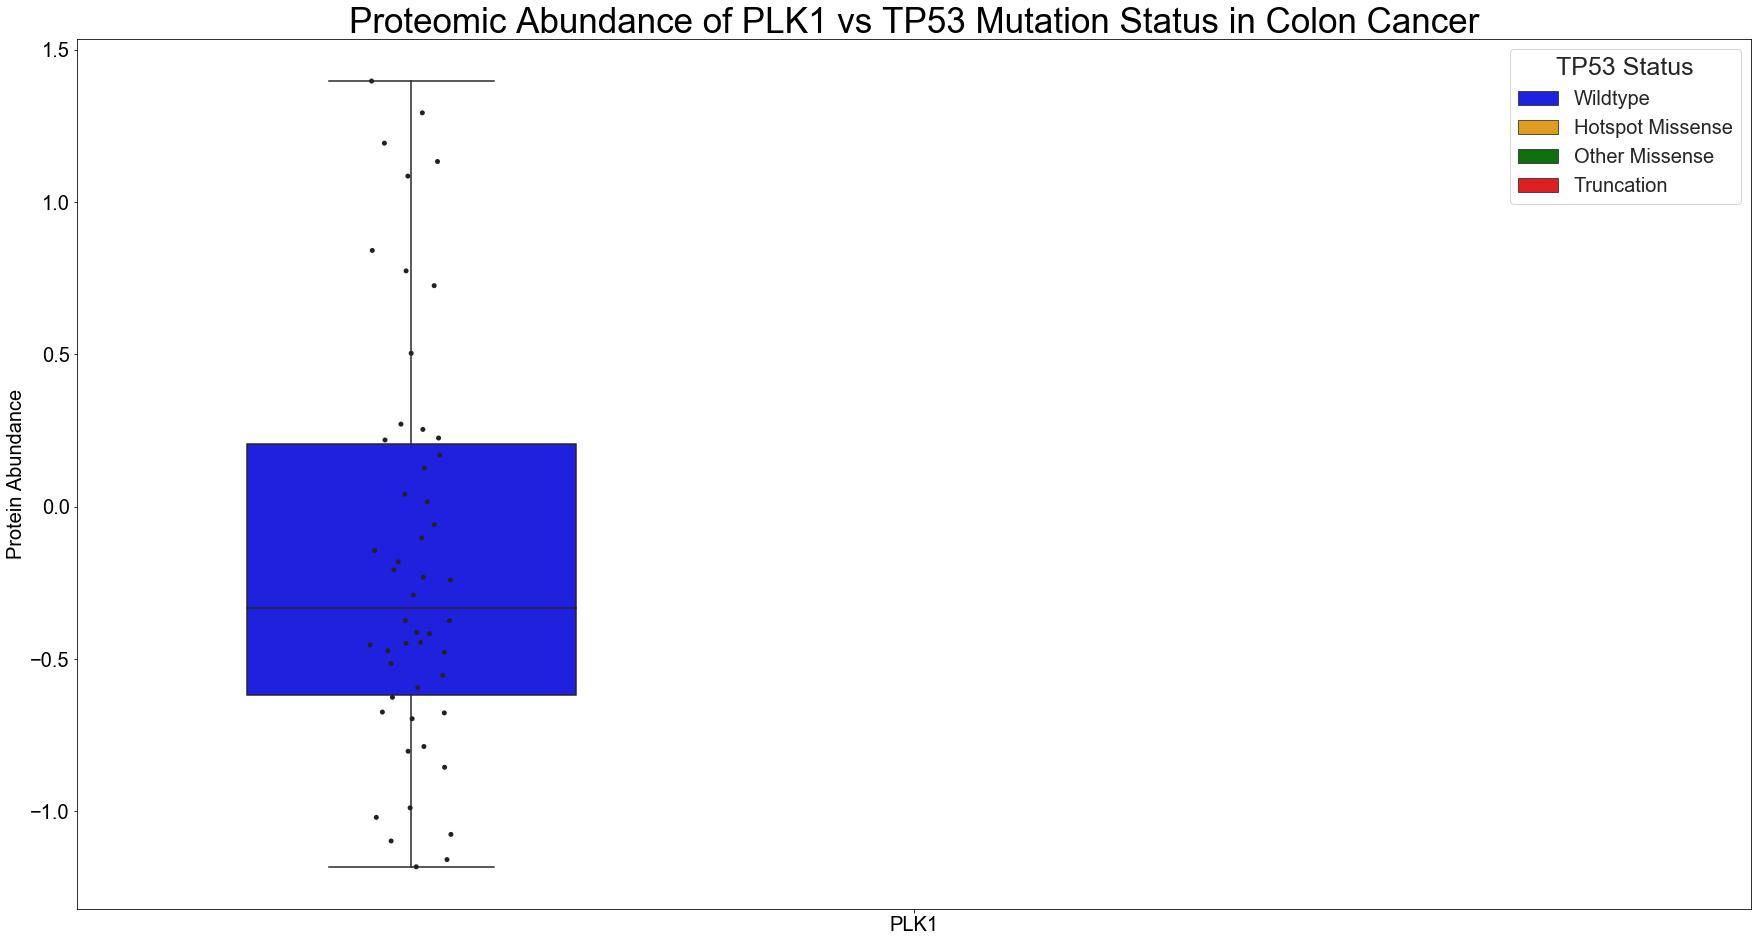

In [20]:
#Set dimensions and Colors
a4_dims = (30, 16)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Wildtype": "blue", "Hotspot Missense": "orange", "Other Missense":"green","Truncation":"red"}

#Make Boxplot
plot = sns.boxplot(data=plotdf, y = 'Abundance', x='Protein', hue='TP53_Categorical', palette=my_pal, hue_order=['Wildtype','Hotspot Missense','Other Missense','Truncation'])

#Overlay Striplot
plot = sns.stripplot(data=plotdf, y = 'Abundance', x='Protein', hue='TP53_Categorical', color='.3', jitter=True, dodge=True, hue_order=['Wildtype','Hotspot Missense','Other Missense','Truncation'])

#Change Style and label sizes
plot.tick_params(labelsize=20)
plot.set_xlabel('')
plot.set_ylabel('Protein Abundance', fontsize='20')
plot.set_title('Proteomic Abundance of PLK1 vs TP53 Mutation Status in Colon Cancer', fontsize = '35')
sns.set_style("white")

#Adjust the Legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:4],['Wildtype','Hotspot Missense','Other Missense','Truncation'], title='TP53 Status', fontsize='20', frameon=True)
plot.get_legend().get_title().set_fontsize('25')

In [21]:
phos_df = co.join_omics_to_mutations(omics_genes='PLK1', omics_df_name='phosphoproteomics', mutations_genes='TP53')
phos_df

Name        PLK1_phosphoproteomics                         TP53_Mutation  \
Site                          T210             Y217                  NaN   
Peptide           tLCGTPNYIAPEVLSK TLCGTPNyIAPEVLSK                  NaN   
Database_ID            NP_005021.2      NP_005021.2                  NaN   
Patient_ID                                                                 
S001                           NaN              NaN     [Wildtype_Tumor]   
S002                           NaN              NaN     [Wildtype_Tumor]   
S003                           NaN              NaN  [Missense_Mutation]   
S004                           NaN         0.098753     [Wildtype_Tumor]   
S005                           NaN              NaN     [Wildtype_Tumor]   
...                            ...              ...                  ...   
S218                           NaN              NaN    [Wildtype_Normal]   
S219                           NaN              NaN    [Wildtype_Normal]   
S220                      0.391604              NaN    [Wildtype_Normal]   
S221                     -0.105612              NaN    [Wildtype_Normal]   
S222                      0.460064              NaN    [Wildtype_Normal]   

Name         TP53_Location TP53_Mutation_Status Sample_Status  
Site                   NaN                  NaN           NaN  
Peptide                NaN                  NaN           NaN  
Database_ID            NaN                  NaN           NaN  
Patient_ID                                                     
S001         [No_mutation]       Wildtype_Tumor         Tumor  
S002         [No_mutation]       Wildtype_Tumor         Tumor  
S003             [p.R280I]      Single_mutation         Tumor  
S004         [No_mutation]       Wildtype_Tumor         Tumor  
S005         [No_mutation]       Wildtype_Tumor         Tumor  
...                    ...                  ...           ...  
S218         [No_mutation]      Wildtype_Normal        Normal  
S219         [No_mutation]      Wildtype_Normal        Normal  
S220         [No_mutation]      Wildtype_Normal        Normal  
S221         [No_mutation]      Wildtype_Normal        Normal  
S222         [No_mutation]      Wildtype_Normal        Normal  

[194 rows x 6 columns]